# Task A

## A1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

### A1.1.a

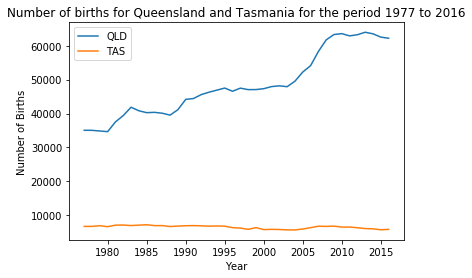

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
0,1977,78173,4381,35069,19086,20981,6739,59602,2923
1,1978,78190,4342,35054,18964,21094,6751,59364,2600
2,1979,77669,4217,34858,18403,20523,6947,58006,2747
3,1980,78859,4181,34666,18317,20354,6660,57768,2859
4,1981,80980,4193,37545,18960,21277,7112,58104,2749
5,1982,82185,4120,39403,19076,22236,7140,59842,3074
6,1983,84180,4081,41863,19445,22442,6994,59768,2991
7,1984,82541,4155,40815,20118,22463,7106,60143,3203
8,1985,83812,4056,40257,19901,22967,7232,60515,3074
9,1986,81351,4112,40355,19657,23290,6974,59935,3441


In [2]:
#1.a
births = pd.read_csv('Datasets/Task A/Births.csv')
plt.plot(births.Year, births.QLD, births.Year, births.TAS)
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of births for Queensland and Tasmania for the period 1977 to 2016')
plt.legend(['QLD','TAS'], loc='best')
plt.show()
births

### A1.1.b

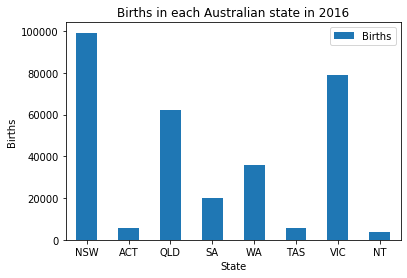

,State,Births
0,NSW,99260
1,ACT,5703
2,QLD,62190
3,SA,19917
4,WA,35875
5,TAS,5869
6,VIC,78953
7,NT,3928


In [3]:
#1.b
condition1 = births['Year']==2016
q1b = births[condition1]
q1b = pd.melt(q1b, value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q1b.rename(columns = {'value':'Births'}, inplace = True)
ax = q1b.plot.bar(x = 'State',y = 'Births', rot = 0, label = 'Births')
plt.title('Births in each Australian state in 2016')
plt.xlabel('State')
plt.ylabel('Births')
plt.show()

q1b

### A1.2.a

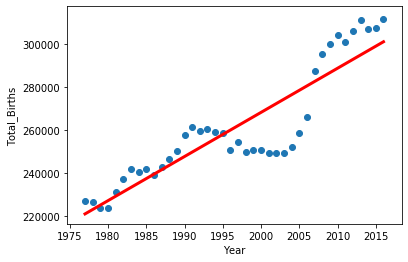

,Year,Total_Birth
0,1977,226954
1,1978,226359
2,1979,223370
3,1980,223664
4,1981,230920
5,1982,237076
6,1983,241764
7,1984,240544
8,1985,241814
9,1986,239115


In [10]:
#2
q2 = pd.melt(births, id_vars = ['Year'], value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q2.rename(columns = {'value': 'Births'}, inplace = True)
fun1 = {'Births':{'Total_Birth': 'sum'}}
q2 = q2.groupby('Year').agg(fun1)
q2 = q2.reset_index()
q2.columns = q2.columns.droplevel(0)
q2.rename(columns = {'':'Year'}, inplace = True)



#2.a

slope, intercept, r_value, p_value, std_err = linregress(q2['Year'],q2['Total_Birth'])
line = [slope*xi + intercept for xi in q2['Year']]
plt.xlabel('Year')
plt.ylabel('Total_Births')
plt.plot(q2['Year'], line, 'r-', linewidth = 3)
plt.scatter(q2['Year'], q2['Total_Birth'])
plt.show()

q2

### A1.2.b
It looks not like a good fit because the regression is not so smooth, the period of 1995 to 2010 is in an unusual trend that going down obviously fraom 1995 to 2004 and going up rapidly from 2005 to 2010.

### A1.2.c

In [5]:
#2.c
birth1 = int(slope * 2050 + intercept)
birth2 = int(slope * 2100 + intercept)
print(birth1,birth2)

370945 473754


The predicted total births in Australia for the years 2050 and 2100 are 370945 and 473754

### A1.2.d

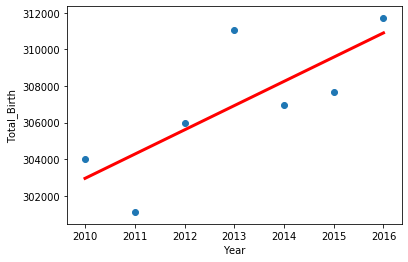

In [6]:
#2.d
q2d = q2[q2.Year >= 2010]
slope, intercept, r_value, p_value, std_err = linregress(q2d['Year'],q2d['Total_Birth'])
line = [slope*xi + intercept for xi in q2d['Year']]
plt.xlabel('Year')
plt.ylabel('Total_Birth')
plt.plot(q2d['Year'], line, 'r-', linewidth = 3)
plt.scatter(q2d['Year'], q2d['Total_Birth'])
plt.show()

The fit spread irregularly and sparsely. The graph in B2.a is better because the period is longer and the data of fit is much more than B2.d, so the linregress is more reasonable.

### A1.2.e

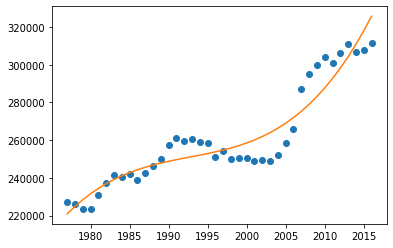

1137796 5872321


In [7]:
#2.e
import numpy as np

coef = np.polyfit(q2.Year, q2.Total_Birth, 3)
line = np.poly1d(coef)

plt.figure()
plt.plot(q2.Year, q2.Total_Birth, 'o', q2.Year, line(q2.Year))
plt.show()

birth2050 = int(line(2050))
birth2100 = int(line(2100))
print(birth2050, birth2100)

The polynomial graph suits the task better because the fit shows a trendency to be twisted and going up, a polynomial graph grows more nearly to the fit than in A2.a.

The predicted total births for 2050 and 2100 are 1137796 and 5872321

### A1.3.a

In [8]:
#3.a
tfr = pd.read_csv('Datasets/Task A/TFR.csv')

q3 = pd.DataFrame(tfr, columns=['Year','QLD','NT'])
condition2 = q3['QLD']==q3['QLD'].min()
q3a = q3[condition2]
q3a

,Year,QLD,NT
28,1999,1.8,2.123


The minimum value for TFR recorded in the dataset for QLD is 1.8 and it was in 1999, in the same year the TFR value for NT is 2.123

### A1.4.a

In [8]:
#4.a
deaths = pd.read_csv('Datasets/Task A/Deaths.csv')
q4 = pd.melt(deaths, id_vars = ['Year'], value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q4.rename(columns = {'value': 'Deaths'}, inplace = True)
fun1 = {'Deaths':{'Total Death': 'sum'}}
q4 = q4.groupby('Year').agg(fun1)
q4 = q4.reset_index()
q4.columns = q4.columns.droplevel(0)
q4.rename(columns = {'':'Year'}, inplace = True)

q4a = pd.merge(q2,q4, on=['Year'])
#deaths
q4a

,Year,Total_Birth,Total Death
0,1977,226954,111490
1,1978,226359,108059
2,1979,223370,108315
3,1980,223664,106654
4,1981,230920,109429
5,1982,237076,110990
6,1983,241764,112918
7,1984,240544,110887
8,1985,241814,114197
9,1986,239115,116069


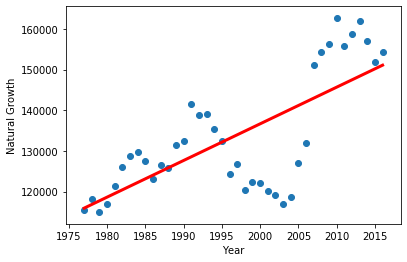

In [10]:
slope, intercept, r_value, p_value, std_err = linregress(q4a['Year'],q4a['Total_Birth']-q4a['Total Death'])
line = [slope*xi + intercept for xi in q4a['Year']]
plt.xlabel('Year')
plt.ylabel('Natural Growth')
plt.plot(q4a['Year'], line, 'r-', linewidth = 3)
plt.scatter(q4a['Year'], q4a['Total_Birth']-q4a['Total Death'])
plt.show()

## A2

### A2.1.a

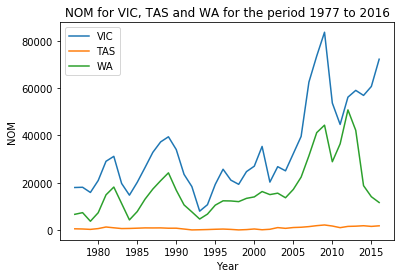

In [11]:
#1.a
nom = pd.read_csv('Datasets/Task A/NOM.csv')
plt.plot(nom.Year, nom.VIC, nom.Year, nom.TAS, nom.Year, nom.WA)
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM for VIC, TAS and WA for the period 1977 to 2016')
plt.legend(['VIC','TAS','WA'], loc='best')
plt.show()

The trend for VIC is alternately going up, the trend for TAS is alternately going up and finally going down, the trend for WA is keeping near 0.

### A2.1.b

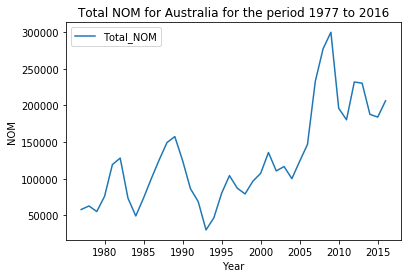

In [12]:
#1.b
a1b = pd.melt(nom, id_vars=['Year'], value_vars=['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name=['State'])
a1b.rename(columns = {'value': 'NOM'},inplace = True)
fun1 = {'NOM':{'Total_NOM': 'sum'}}
a1b = a1b.groupby('Year').agg(fun1)
a1b = a1b.reset_index()
a1b.columns = a1b.columns.droplevel(0)
a1b.rename(columns = {'':'Year'}, inplace = True)
plt.plot(a1b.Year, a1b.Total_NOM)
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('Total NOM for Australia for the period 1977 to 2016')
plt.legend(['Total_NOM'], loc='best')
plt.show()

This trend is strange because the increase and decrease are both rapidly during 1977 to 2016.

### A2.2.a

In [13]:
#2.a
nim = pd.read_csv('Datasets/Task A/NIM.csv')

nom1 = pd.melt(nom, id_vars = ['Year'], value_vars = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'], var_name = 'State')
nom1.rename(columns = {'value': 'NOM'}, inplace = True)

nim1 = pd.melt(nim, id_vars = ['Year'], value_vars = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'], var_name = 'State')
nim1.rename(columns = {'value': 'NIM'}, inplace = True)

q2a = pd.merge(nom1,nim1, on=['Year','State'])
q2a
#First year is 1977 and last year is 2016

,Year,State,NOM,NIM
0,1977,NSW,25236,-9000
1,1978,NSW,25825,-2000
2,1979,NSW,28086,1500
3,1980,NSW,33499,-2000
4,1981,NSW,47291,-14963
5,1982,NSW,49393,-19584
6,1983,NSW,25740,-17181
7,1984,NSW,20698,-10267
8,1985,NSW,31279,-9328
9,1986,NSW,40922,-12462


First year is 1977 and last year is 2016

### A2.2.b

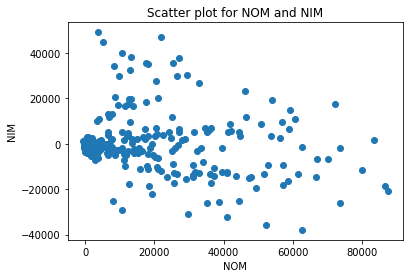

In [14]:
#2.b

plt.figure()
plt.scatter(q2a.NOM, q2a.NIM)
plt.title('Scatter plot for NOM and NIM')
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

Most of the values of NOM are around 0 in NIM.

### A2.2.c

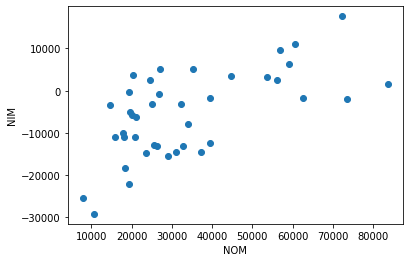

In [15]:
#2.c
q2c = q2a[q2a.State == 'VIC']

plt.figure()
plt.scatter(q2c.NOM, q2c.NIM)
plt.xlabel('NOM')
plt.ylabel('NIM')

plt.show()


From the data of VIC, the NIM increases while NOM increasing.

### A2.2.d

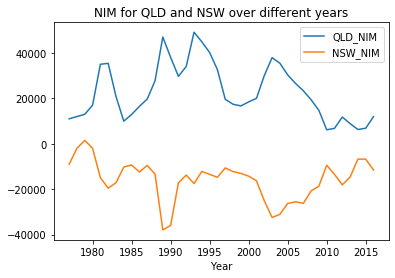

In [16]:
#2.d
plt.plot(nim.Year, nim.QLD, nim.Year, nim.NSW)
plt.xlabel('Year')
plt.title('NIM for QLD and NSW over different years')
plt.legend(['QLD_NIM','NSW_NIM'], loc='best')
plt.show()


The NIM for QLD and NSW have nearly opposite trends

## A3

In [17]:
mNom = nom.melt(id_vars ='Year', var_name ='State', value_name='NOM')
mNim = nim.melt(id_vars ='Year', var_name ='State', value_name='NIM')
mBirth = births.melt(id_vars ='Year', var_name ='State', value_name='Birth')
mDeath = deaths.melt(id_vars ='Year', var_name ='State', value_name='Death')
mTfr = tfr.melt(id_vars ='Year', var_name ='State', value_name='TFR')

a3 = mNom.merge(mNim, on = ['Year', 'State'])
a3 = a3.merge(mBirth, on = ['Year', 'State'])
a3 = a3.merge(mDeath, on = ['Year', 'State'])
a3 = a3.merge(mTfr, on = ['Year', 'State'])

tpg = a3.Birth - a3.Death + a3.NOM + a3.NIM
a3['Total_Population_Growth'] = tpg
a3.head()

,Year,State,NOM,NIM,Birth,Death,TFR,Total_Population_Growth
0,1977,NSW,25236,-9000,78173,42075,1.995,52334
1,1978,NSW,25825,-2000,78190,40121,1.953,61894
2,1979,NSW,28086,1500,77669,39975,1.902,67280
3,1980,NSW,33499,-2000,78859,39799,1.925,70559
4,1981,NSW,47291,-14963,80980,39979,1.942,73329


### A3.1

In [18]:
#A3.1

from motionchart.motionchart import MotionChart

mchart = MotionChart(df = a3, key='Year', x='NOM', y='NIM', size='Total_Population_Growth', category='State')
mchart.to_notebook()

### A3.2.a

The value of NOM and NIM tends to keep contracting after expansion and then expaning again after severals(e.g. 1983, 1995 and 2003)

In [20]:
#A3.2.b
nom.Year[nom.VIC > nom.NSW]

29    2006
Name: Year, dtype: int64

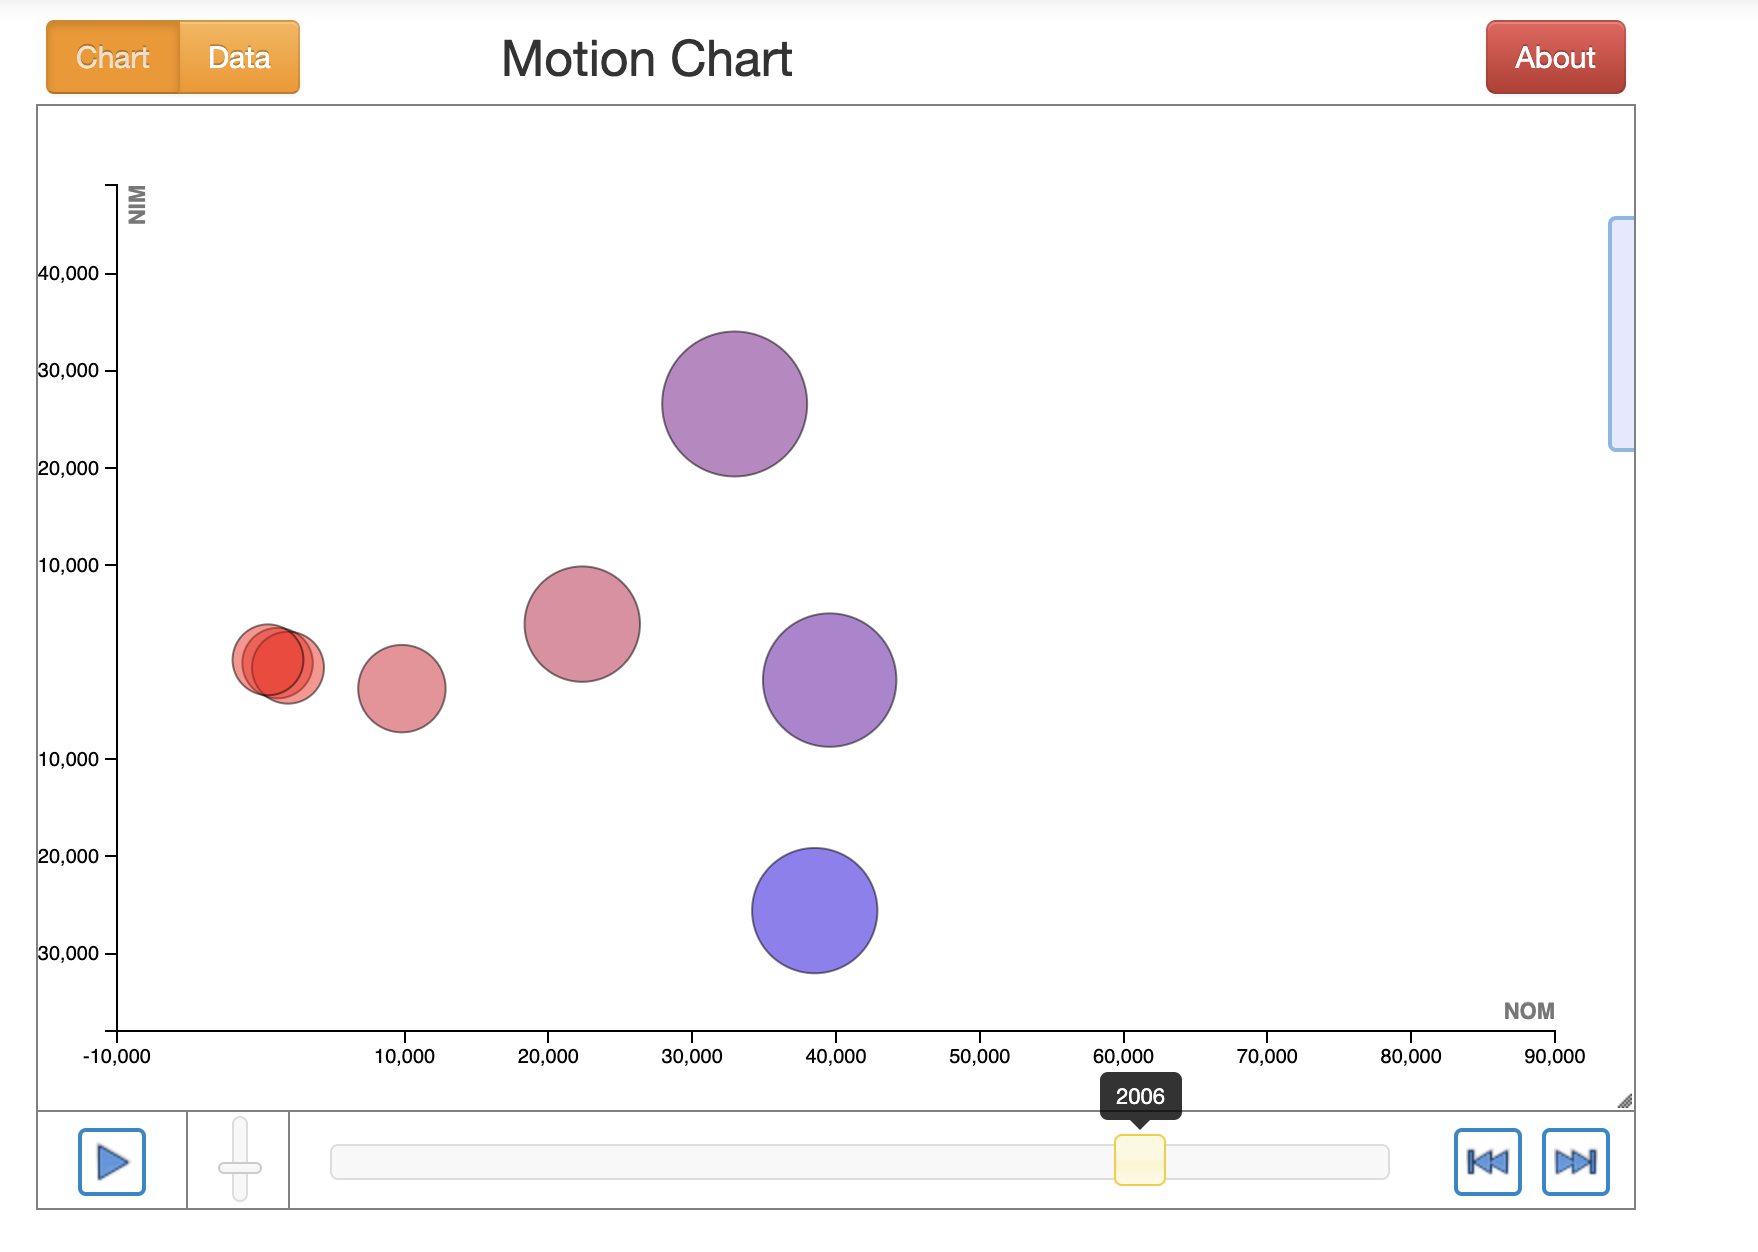

### A3.2.c

In [21]:
#A3.2.c
a3.State[a3.NIM.idxmax()]

'QLD'

# Task B

## B1

### B1.1

In [22]:
#1.1
cssa = pd.read_csv('Datasets/Task B/Crime_Statistics_SA_2014_2019.csv')
b11 = cssa.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()
b11 = b11[b11>=15].groupby('Suburb - Incident').count()
b11



Suburb - Incident
ADELAIDE           877
ASCOT PARK           1
DAVOREN PARK         1
FINDON               1
GLENELG              1
LOXTON               1
MARLESTON            1
MODBURY              1
MORPHETT VALE        3
MOUNT BARKER         1
MOUNT GAMBIER        3
MURRAY BRIDGE        5
NOT DISCLOSED        5
NURIOOTPA            1
OAKLANDS PARK        3
PORT AUGUSTA         4
PORT LINCOLN         5
PROSPECT             2
SALISBURY NORTH      1
SEAFORD MEADOWS      1
ST GEORGES           1
Name: Offence Count, dtype: int64

### B1.2

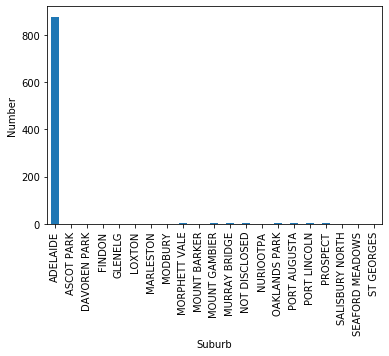

In [23]:
#1.2
ax = b11.plot.bar(x = 'Suburb - Incident', y = '', rot = 90)
plt.xlabel('Suburb')
plt.ylabel('Number')
plt.show()

### B1.3

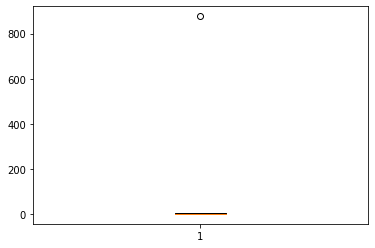

In [24]:
#1.3

plt.boxplot(b11)
plt.show()

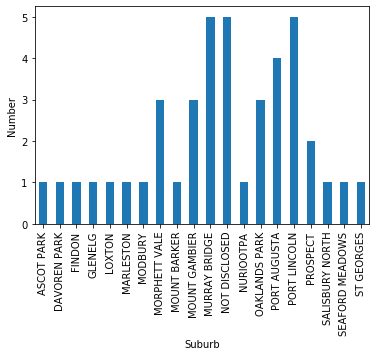

In [25]:
b11.drop(index = 'ADELAIDE', inplace = True)
ax = b11.plot.bar(x = 'Suburb - Incident', y = '', rot = 90)
plt.xlabel('Suburb')
plt.ylabel('Number')
plt.show()

### B1.4

Step 3 is easier to interpret, because the data of ADELAIDE is much higher than other suburbs, so after removing ADELAIDE, it is easier to analyse the differences among other suburbs.

### B2.1

In [26]:
#2.1
qb2 = cssa.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
qb2 = qb2[qb2>= 15].groupby('Postcode - Incident').count()
qb2

Postcode - Incident
5000             723
5000.0           153
5007.0             1
5015               1
5023               1
5033.0             1
5043.0             1
5045               2
5045.0             1
5046               4
5046.0             1
5061               1
5064.0             1
5082               1
5082.0             1
5085               1
5086               1
5086.0             1
5092               1
5095               1
5108             235
5108.0            33
5112             143
5112.0            30
5113              38
5113.0             5
5114              25
5114.0             2
5158               1
5162               6
5162.0             3
5163               1
5163.0             1
5169               2
5251               1
5253               7
5253.0             2
5290               3
5333               1
5355               1
5540               1
5606               3
5606.0             2
5608               9
5608.0             2
5700               8
5700.0        

## B2.2
The postcode contains float data that contains '.0', these data would lead to incorrect counts on postcode. For example, 5000 and 5000.0 are the same code, however they would not be identified as same. Also, there are data named 'NOT DISCLOSED'.

Solution: replace the 'NOT DISCLOSED' with int 0 and convert the float number to int

In [27]:
#b2.2

#cssa['Postcode - Incident'] = cssa[cssa['Postcode - Incident'] != 'NOT DISCLOSED']
cssa['Postcode - Incident'].replace('NOT DISCLOSED', '0', inplace = True)
#cssa['Postcode - Incident'].dropna()
cssa['Postcode - Incident'].fillna('0', inplace = True) 
cssa['Postcode - Incident'] = cssa['Postcode - Incident'].astype('float').astype('int')


qb22 = cssa.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
qb22 = qb22[qb22>= 15].groupby('Postcode - Incident').count()
qb22

Postcode - Incident
0         6
5000    876
5007      1
5015      1
5023      1
5033      1
5043      1
5045      3
5046      5
5061      1
5064      1
5082      2
5085      1
5086      2
5092      1
5095      1
5108    268
5112    173
5113     43
5114     27
5158      1
5162      9
5163      2
5169      2
5251      1
5253      9
5290      3
5333      1
5355      1
5540      1
5606      5
5608     11
5700     10
Name: Offence Count, dtype: int64

### B2.3

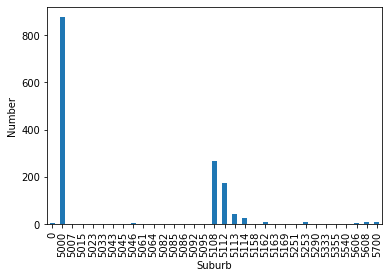

In [28]:
#B2.3

ax = qb22.plot.bar(x = 'Postcode - Incident', y = '', rot = 90)
plt.xlabel('Suburb')
plt.ylabel('Number')
plt.show()

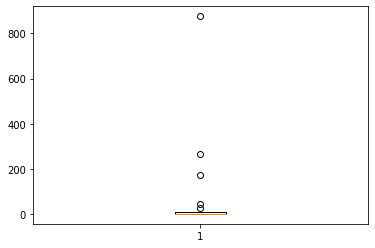

In [29]:
plt.boxplot(qb22)
plt.show()

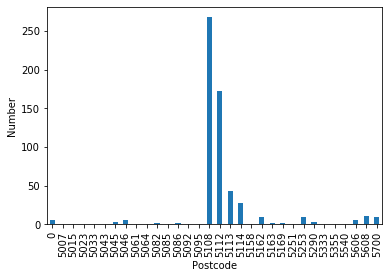

In [30]:
qb22.drop(index = 5000, inplace = True)
ax = qb22.plot.bar(x = 'Postcode - Incident', y = '', rot = 90)
plt.xlabel('Postcode')
plt.ylabel('Number')
plt.show()

After fixing the errors, there are more data that greater than 10 in B3 compared with B1, and besides of the suburb with postcode of 5000, the suburbs with postcode of 5108 and 5112 are also obviously greater than other data, so the graph containing 5000 may better show the trend.

# Task C

In this task I find a dataset named 'Suicide Rates Overview 1985 to 2016' from 
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/downloads/suicide-rates-overview-1985-to-2016.zip/1

In [31]:
sro = pd.read_csv('master.csv')
sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [32]:
condition1 = sro['country']=='Albania'
condition2 = sro['sex']=='male'
condition3 = sro['sex']=='female'
func1 = {'suicides_no':{'male': 'sum'}}
func2 = {'suicides_no':{'female': 'sum'}}
q1 = sro[condition1 & condition2]
q1a = q1.groupby(['year','sex']).agg(func1)
q1b = sro[condition1 & condition3]
q1b = q1b.groupby(['year','sex']).agg(func2)
q11 = pd.merge(q1a, q1b, on=['year'])
q11 = q11.reset_index()
q11.columns = q11.columns.droplevel(0)
q11.rename(columns = {'':'year'}, inplace = True)
q11

/Users/linch/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,male,female
0,1987,48,25
1,1988,41,22
2,1989,53,15
3,1992,33,14
4,1993,46,27
5,1994,35,15
6,1995,54,34
7,1996,50,39
8,1997,118,52
9,1998,96,58


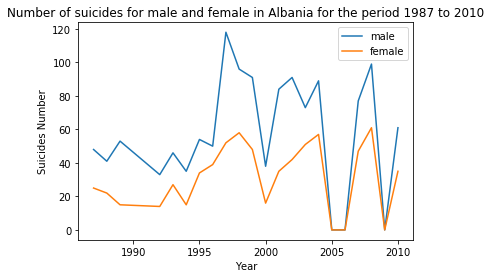

In [33]:
plt.plot(q11.year, q11.male, q11.year, q11.female)
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Number of suicides for male and female in Albania for the period 1987 to 2010')
plt.legend(['male','female'], loc='best')
plt.show()

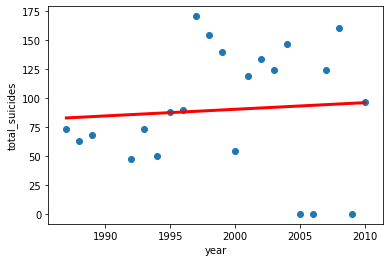

In [34]:
q2 = sro[condition1]
func = {'suicides_no': {'total_suicides': 'sum'}}
q2 = q2.groupby('year').agg(func)
q2 = q2.reset_index()
q2.columns = q2.columns.droplevel(0)
q2.rename(columns = {'':'year'}, inplace = True)

slope, intercept, r_value, p_value, std_err = linregress(q2['year'],q2['total_suicides'])
line = [slope*xi + intercept for xi in q2['year']]
plt.xlabel('year')
plt.ylabel('total_suicides')
plt.plot(q2['year'], line, 'r-', linewidth = 3)
plt.scatter(q2['year'], q2['total_suicides'])
plt.show()

The graph above shows that the total suicides in Albania are increasing slightly from 1987 to 2010.

In [35]:
suicide2020 = int(slope * 2020 + intercept)
print("The predicition of suicides in 2020 for Albania is", suicide2020)

The predicition of suicides in 2020 for Albania is 101


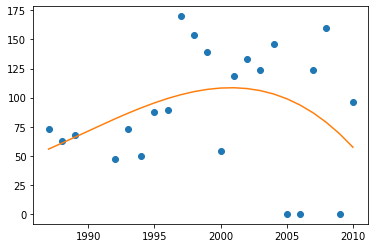

-165


In [36]:
coef = np.polyfit(q2.year, q2.total_suicides, 3)
line = np.poly1d(coef)

plt.figure()
plt.plot(q2.year, q2.total_suicides, 'o', q2.year, line(q2.year))
plt.show()

suicide2020 = int(line(2020))
print(suicide2020)

In this case, the polyfit figure leads to a negative value, obviously it is an impossible number for suicides, so the predicition of suicides in 2020 for Albania is 101